## <font color="darkblue">Introduction</font>
This slide is generated according to the lesson from ["Handling Imbalanced Datasets SMOTE Technique"](https://www.youtube.com/watch?v=dkXB8HH_4-k&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU):
* [youtube_ai_ml/SMOTE - Handling Imbalance Dataset.ipynb](https://github.com/ashokveda/youtube_ai_ml/blob/master/SMOTE%20-%20Handling%20Imbalance%20Dataset.ipynb)
* [youtube_ai_ml/car_evaluation.csv](https://github.com/ashokveda/youtube_ai_ml/blob/master/car_evaluation.csv)

## <font color='darkblue'>What's imbalanced data and how it impact ML</font>
Consider we have a data set with labeling as `Cancer` (100 records) and `No Cancer` (900 records). Here we have an imbalanced category ratio and Label `Cancer` is a majority and label `No Cancer` is a minority. There is no clear definition for how larger a ration can we call the dataset as an imbalanced dataset. <b>You can choose to deal with this problem or not according to how great impact it brings to the performance of your machine learning model</b>.
![imbalanced data](images/1.PNG) <br/>

There are some well-known approaches such as "<b>Under sampling</b>", "<b>Over sampling</b>" and "<b>SMOTE</b>"


### <font color='darkgreen'>Under sampling</font>
We can do sampling the data of majority category to let it has same amount of data as minority category. However, the data itself is precious and we may waste our data by taking this approach.<br/>
![imbalanced data](images/2.PNG) <br/>

### <font color='darkgreen'>Over sampling</font>
For over sampling, we try to make the amount of data from minority category to as much as the data of majority category.<br/>
![imbalanced data](images/3.PNG) <br/>

### <font color='darkgreen'>SMOTE</font>
<b>[SMOTE](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#SMOTE)</b> is the abbreviation of "Synthetic Minority Over-sampling Technique". It will generate data (orange color) based on distribution of minority (red color) to let minority category to have as much data as the majority category:<br/>
![imbalanced data](images/4.PNG) <br/>


## <font color='darkblue'>How To Apply SMOTE</font>
Let's check a simple example to see how it works.

### <font color='darkgreen'>Loading Data</font>
First of all, let's load in the dataset:

In [1]:
import pandas as pd

data = pd.read_csv('car_evaluation.csv')
data.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
# We can observe from the labeling distribution to learn that this data is imbalanced.
# The majority outcome/category is "unacc"
data['outcome'].hist();

### <font color='darkgreen'>Performance without SMOTE</font>
Now we conduct the training on the original dataset to see how it goes:

In [3]:
X = data.iloc[:,:-1]
y = data.outcome
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['buying','maint','lug_boot','safety']] = \
X.loc[:,['buying','maint','lug_boot','safety']].apply(enc.fit_transform)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
len(list(filter(lambda e: e=='good', y_predict)))  # Number of prediction as "good"

14

In [7]:
from sklearn.metrics import accuracy_score
print("Training without SMOTE with accuracy: {:.02f}%".format(100* accuracy_score(y_test,y_predict)))
pd.crosstab(y_test, y_predict)

Training without SMOTE with accuracy: 92.87%


col_0,acc,good,unacc,vgood
outcome,,,,
acc,89,2,11,0
good,10,10,1,0
unacc,5,0,366,0
vgood,5,2,1,17


In [8]:
def get_precision_and_recall(y_test, y_predict, label):
    tp, tn, fp, fn = 0, 0, 0, 0
    for ans, pred in zip(y_test, y_predict):
        if ans == label and pred == label:
            tp += 1
        elif ans == label and pred != label:
            fn += 1
        elif ans != label and pred == label:
            fp += 1
        else:
            tn += 1
            
    return tp / (tp + fp), tp / (tp + fn)

In [9]:
# Check the performance by each category
for cate in ["acc", "good", "unacc", "vgood"]:
    p, r = get_precision_and_recall(y_test, y_predict, cate)
    print("Category={} with precision={:.02f}; recall={:.02f}".format(cate, p, r))

Category=acc with precision=0.82; recall=0.87
Category=good with precision=0.71; recall=0.48
Category=unacc with precision=0.97; recall=0.99
Category=vgood with precision=1.00; recall=0.68


The performance (accuracy) of original dataset looks fine as below :
![imbalanced data](images/5.PNG) <br/>

### <font color='green'>Performance without SMOTE</font>
Now, let's use SMOTE from <b>[package imblean](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)</b> to deal with imbalanced data here:

In [10]:
!pip install imblearn

You should consider upgrading via the 'c:\users\johnlee\appdata\local\programs\python\python36\python.exe -m pip install --upgrade pip' command.


In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [12]:
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [13]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({'unacc': 839, 'acc': 282, 'good': 48, 'vgood': 40})
After SMOTE : Counter({'acc': 839, 'unacc': 839, 'vgood': 839, 'good': 839})


In [14]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9441233140655106


col_0,acc,good,unacc,vgood
outcome,,,,
acc,92,6,3,1
good,1,20,0,0
unacc,14,1,355,1
vgood,1,1,0,23


In [15]:
# Check the performance by each category
for cate in ["acc", "good", "unacc", "vgood"]:
    p, r = get_precision_and_recall(y_test, y_predict, cate)
    print("Category={} with precision={:.02f}; recall={:.02f}".format(cate, p, r))

Category=acc with precision=0.85; recall=0.90
Category=good with precision=0.71; recall=0.95
Category=unacc with precision=0.99; recall=0.96
Category=vgood with precision=0.92; recall=0.92


From below result, we learned that SMOTE can help our model to perform better than original dataset:
![imbalanced data](images/6.PNG) <br/>

## <font color='darkblue'>Built-in weights from Scikit-learn</font>
From the [lesson here](https://www.youtube.com/watch?v=Kp31wfHpG2c&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=6&t=541s), we learned that some classifier(s) from <b>[scikit-learn](https://scikit-learn.org/stable/index.html)</b> support handling of imbalanced data. Take <b>[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn-linear-model-logisticregression)</b> for example, it support argument `class_weight`:
```
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
```

### <font color='darkgreen'>Baseline</font>
Here we will see how we can use this setting to improve the performance of our model ([original notebook link](https://github.com/bhattbhavesh91/imbalance_class_sklearn/blob/master/imbalance_class_undersampling_oversampling_updated.ipynb)). Firstly, to import necessary packages:

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Configure chart setting:

In [17]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

Then for some utility functions:

In [18]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

For the csv to be loaded in below, please go to [this link](https://github.com/bhattbhavesh91/imbalance_class_sklearn/blob/master/data.rar) to download `data.rar` and decompress it.

In [19]:
df = pd.read_csv('data.csv')

In [20]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Then let's separate the features `X` and labels `Y`:

In [21]:
target_column_name = 'Class'
X = df.loc[:, df.columns!=target_column_name]
Y = df.loc[:, df.columns==target_column_name]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [22]:
# Check the distribution of class which is total imbalanced data
Y_train['Class'].value_counts()

0    190477
1       343
Name: Class, dtype: int64

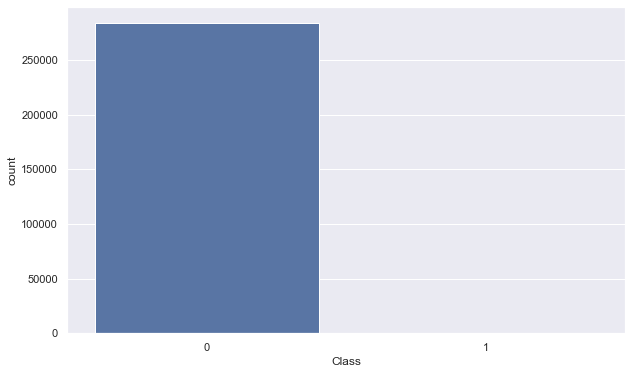

In [23]:
ax = sns.countplot(x=target_column_name, data=df)

In [24]:
percent_of_minority = 100* (len(Y_train[Y_train['Class'] == 1])/float(Y_train.shape[0]))
percent_of_majority = 100* (len(Y_train[Y_train['Class'] == 0])/float(Y_train.shape[0]))
print("minority percentage={:.02f}; majority percentage={:.02f}".format(percent_of_minority, percent_of_majority))

minority percentage=0.18; majority percentage=99.82


Now let's check the performance of model with default hyper-parameters:

In [25]:
# Training
clf = LogisticRegression().fit(X_train, Y_train)

In [26]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [27]:
# Confusion table
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93792,58
1,46,91


Let's generate the report for common performance index:

In [28]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9988934639897007
Precision =  0.6642335766423357
Recall =  0.610738255033557
F1 Score =  0.6363636363636364


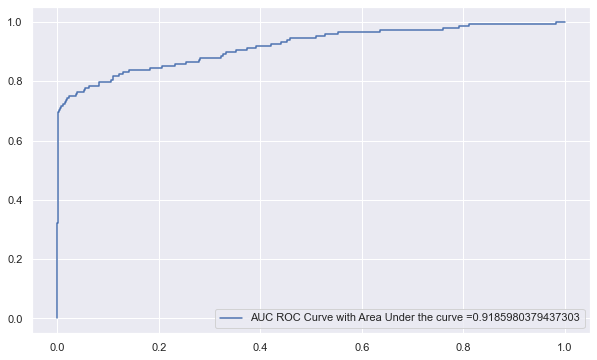

In [29]:
generate_auc_roc_curve(clf, X_test)

### <font color='darkgreen'>class_weight='balanced'</font>
Now let's check what performance impact can `class_weight='balanced'` bring in:

In [30]:
unique_classes = list(df[target_column_name].unique())
unique_classes

[0, 1]

Let's calculate the weight for each class based on the amount of data of each class:

In [33]:
out_dict = {}
for clz in unique_classes:
    out_dict[clz] = df.shape[0]/((df.loc[df[target_column_name] == clz].shape[0]) * len(unique_classes))

In [34]:
out_dict

{0: 0.5008652375006595, 1: 289.4380081300813}

Because class 0 is majority, so the weighting of it is smaller than the class 1. Above is a example to calculate the weighting of class. Now let's train the classifier with `class_weight='balanced'`:

In [35]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

In [36]:
from sklearn.utils import class_weight
# The weighting calculated by scikit-learn
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target_column_name])

array([  0.50090037, 278.16326531])

Now let's check the performance:

In [37]:
Y_Test_Pred = clf.predict(X_test)
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,90719,12
1,3119,137


The performance outcome is not so exciting and we increase the FP (False Positive) a lot from 46 -> 3119 even we increase the TP (True Positive) too from 91 -> 137. Let's check more performance index:

In [38]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9666868822283933
Precision =  0.04207616707616708
Recall =  0.9194630872483222
F1 Score =  0.08046989720998532


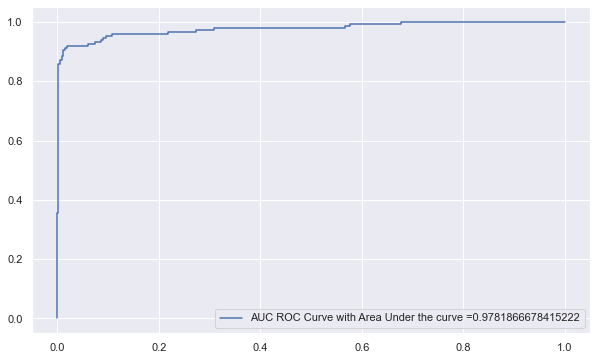

In [39]:
generate_auc_roc_curve(clf, X_test)

We can do one more step to find out the optimal weighting by [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html):

In [44]:
# The execution in this cell will take a long time
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

%time grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Wall time: 4min 26s
Best parameters : {'class_weight': {0: 0.381578947368421, 1: 0.618421052631579}}


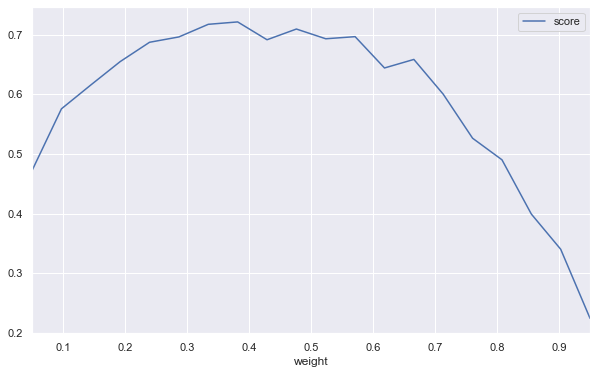

In [45]:
# How the score change over the weight setting increase
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'], 'weight': weights })
data_out.plot(x='weight')

In [48]:
# Top 10 best scores
data_out.sort_values('score', ascending=False)[:10]

,score,weight
7,0.721094,0.381579
6,0.717084,0.334211
9,0.709174,0.476316
11,0.696400,0.571053
5,0.695953,0.286842
10,0.692859,0.523684
8,0.691215,0.428947
4,0.686990,0.239474
13,0.658241,0.665789
3,0.654607,0.192105


Then we use optimal `class_weight` to retrain the model:

In [49]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)

In [50]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [52]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93781,36
1,57,113


The performance outcome is better than the previous one. We slightly increase the FP (False Positive) from 46 -> 57 and increase the TP (True Positive) too from 91 -> 113 as well. Let's check more performance index:

In [53]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9990105014523285
Precision =  0.6647058823529411
Recall =  0.7583892617449665
F1 Score =  0.7084639498432601


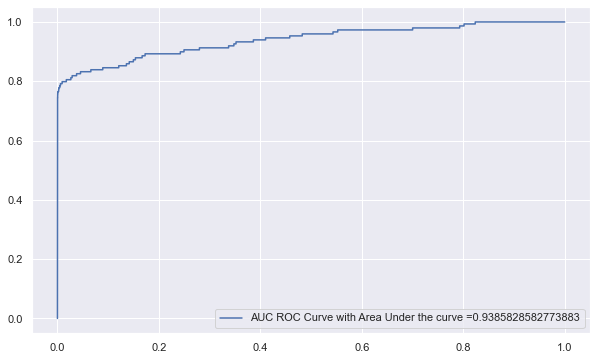

In [54]:
generate_auc_roc_curve(clf, X_test)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

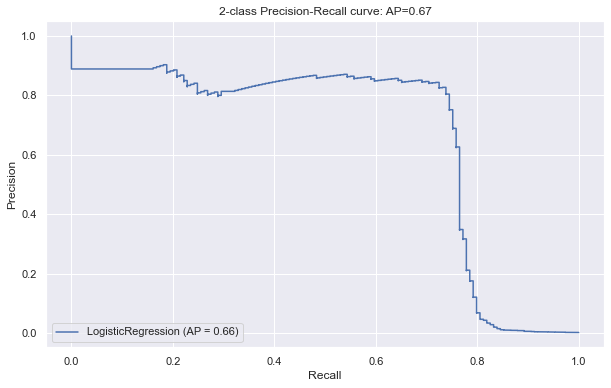

In [59]:
# PR curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

Y_score = clf.decision_function(X_test)
average_precision = average_precision_score(Y_test, Y_score)
disp = plot_precision_recall_curve(clf, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### <font color='darkgreen'>Applying SMOTE</font>
So let's check what SMOTE can perform in this case:

In [60]:
# Check class distribution
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 190477, 1: 343}

Now let's use SMOTE to generate instances for minority class:

In [64]:
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [65]:
# Check class distribution again
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 190477, 1: 190477}

Now let's use the balanced data to train the model:

In [66]:
clf = LogisticRegression().fit(x_train_res, y_train_res)

In [68]:
# Prediction
Y_Test_Pred = clf.predict(X_test)

In [70]:
# Confusion matrix
pd.crosstab(Y_Test_Pred, Y_test[target_column_name], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,92183,15
1,1655,134


The performance outcome doesn't look quite good. We increase the FP (False Positive) from <font color='red'>46 -> 1655</font> and improve the TP (True Positive) too from <font color='blue'>91 -> 134</font> as well. Let's check more performance index:

In [71]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9822315852192325
Precision =  0.07490217998882057
Recall =  0.8993288590604027
F1 Score =  0.13828689370485037


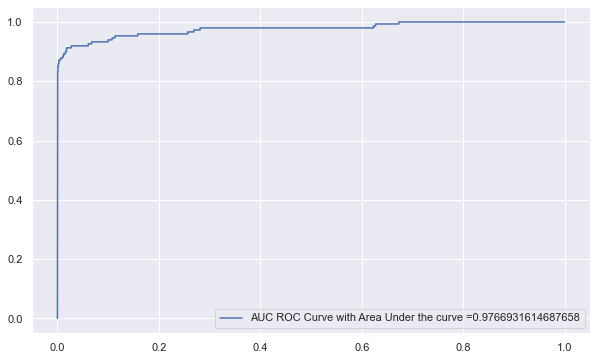

In [72]:
generate_auc_roc_curve(clf, X_test)

Now let's make it more advanced by combining SMOTE and `class_weight` setting:

In [73]:
weights = np.linspace(0.005, 0.25, 10)
weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

In [78]:
SMOTE(sampling_strategy=weights)

SMOTE(sampling_strategy=array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ]))

Then it is time to build the pipeline and do the grid search (take a long time):

In [80]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(estimator=pipe, param_grid={'smote__sampling_strategy': weights}, scoring='f1', cv=3)
%time grid_result = gsc.fit(X_train, Y_train)

Wall time: 1min 36s


Let's check the performance:

Best parameters : {'smote__sampling_strategy': 0.005}


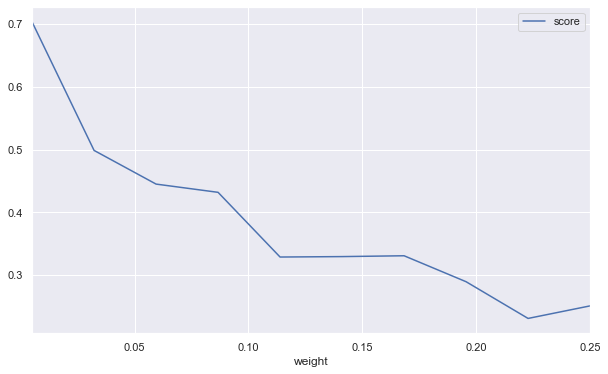

In [81]:
print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [82]:
# Let's apply the optimal setting sampling_strategy=0.005
pipe = make_pipeline(
    SMOTE(sampling_strategy=0.005),
    LogisticRegression()
)

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [84]:
# Confusion matrix

pd.crosstab(Y_Test_Pred, Y_test[target_column_name], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93763,36
1,75,113


The performance looks quite good. We slightly increase the FP (False Positive) from <font color='red'>46 -> 75</font> and improve the TP (True Positive) too from <font color='blue'>91 -> 113</font> as well. Let's check more performance index:

More performance index:

In [85]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9988189856043921
Precision =  0.601063829787234
Recall =  0.7583892617449665
F1 Score =  0.6706231454005935


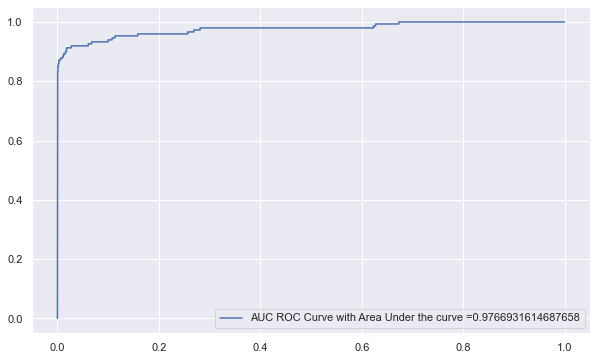

In [86]:
generate_auc_roc_curve(clf, X_test)

## <font color='darkblue'>Supplement</font>
* [Confusion Matrix in Machine Learning](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/)
* [Aditya Lahiri: Dealing With Imbalanced Classes in Machine Learning | PyData New York 2019](https://www.youtube.com/watch?v=6M2d2n-QXCc&t=782s)
* [Class Weights for Handling Imbalanced Datasets](https://www.youtube.com/watch?v=Kp31wfHpG2c&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=6&t=541s)
* [SMOTE - Synthetic Minority Oversampling Technique](https://www.youtube.com/watch?v=FheTDyCwRdE&list=PLyQnbMWK6HUVWtYO8H2SRZLFc99oznMYU&index=4)
* [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)